In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.vq import kmeans

%matplotlib inline

In [44]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/un/un.csv'

UN_data = pd.read_csv(data_url, header = 0)

In [45]:
print('The UN dataset contains %d rows.\n' % len(UN_data))

for col in UN_data.columns:
    print('Column %s has %d null values.' % (col, UN_data[col].isnull().sum()))
    
    print('Column %s contains a %s data type.\n' % (col, type(UN_data[col][0])))

The UN dataset contains 207 rows.

Column country has 0 null values.
Column country contains a <type 'str'> data type.

Column region has 0 null values.
Column region contains a <type 'str'> data type.

Column tfr has 10 null values.
Column tfr contains a <type 'numpy.float64'> data type.

Column contraception has 63 null values.
Column contraception contains a <type 'numpy.float64'> data type.

Column educationMale has 131 null values.
Column educationMale contains a <type 'numpy.float64'> data type.

Column educationFemale has 131 null values.
Column educationFemale contains a <type 'numpy.float64'> data type.

Column lifeMale has 11 null values.
Column lifeMale contains a <type 'numpy.float64'> data type.

Column lifeFemale has 11 null values.
Column lifeFemale contains a <type 'numpy.float64'> data type.

Column infantMortality has 6 null values.
Column infantMortality contains a <type 'numpy.float64'> data type.

Column GDPperCapita has 10 null values.
Column GDPperCapita contains

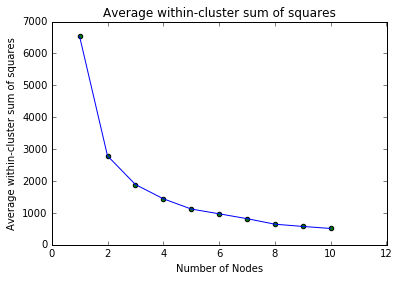

In [46]:
#Apply kMeans to subset of UN data
data_grp = ['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']

UN_data = UN_data.dropna(subset = data_grp)

score = []
num_nodes = []

for code in range(1,11):
    centroids = kmeans(np.array(UN_data[data_grp]), code)
    
    distance = [1e10]*len(UN_data)
    ctr_label = [0]*len(UN_data)
    
    for k, indx in enumerate(UN_data.index):
        
        point = UN_data[data_grp].loc[indx].values

        for i, center in enumerate(centroids[0]):

            target = 0
            for j, ctr_pt in enumerate(center):

                target = target + pow(point[j] - ctr_pt, 2)
            
            target = pow(target, 0.5)
            
            if target < distance[k]:
                distance[k] = target
                ctr_label[k] = i
    
    score.append(np.mean(distance))
    num_nodes.append(code)
    
    
plt.plot(num_nodes, score)
plt.scatter(num_nodes, score, c = 'green', marker = 'o')
plt.title('Average within-cluster sum of squares')
plt.xlabel('Number of Nodes')
plt.ylabel('Average within-cluster sum of squares')

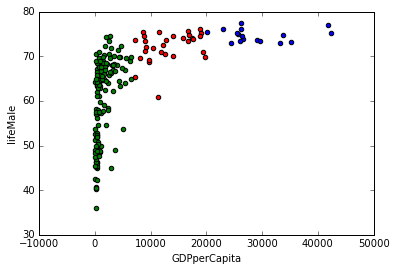

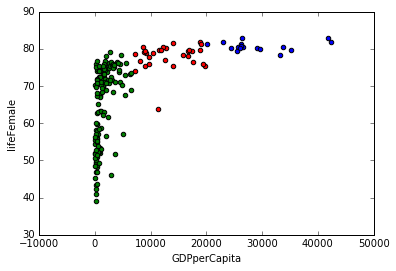

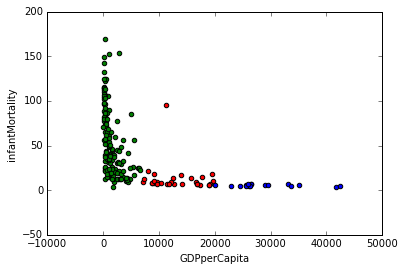

In [47]:
code = 3

centroids = kmeans(np.array(UN_data[data_grp]), code)

distance = [1e10]*len(UN_data)
ctr_label = [0]*len(UN_data)

for k, indx in enumerate(UN_data.index):

    point = UN_data[data_grp].loc[indx].values

    for i, center in enumerate(centroids[0]):

        target = 0
        for j, ctr_pt in enumerate(center):

            target = target + pow(point[j] - ctr_pt, 2)

        target = pow(target, 0.5)

        if target < distance[k]:
            distance[k] = target
            ctr_label[k] = i
    
UN_data['distance'] = distance
UN_data['ctr_label'] = ctr_label
UN_data['ctr_label'] = UN_data['ctr_label'].astype('category')

color = ['red', 'green', 'blue', 'black']

for y_axis in data_grp:
    
    if y_axis != 'GDPperCapita':
        plt.figure()
        for i, cat in enumerate(UN_data['ctr_label'].cat.categories):
            plt.scatter(UN_data[UN_data['ctr_label'] == cat]['GDPperCapita'], 
                        UN_data[UN_data['ctr_label'] == cat][y_axis], c = color[i])

        plt.xlabel('GDPperCapita')
        plt.ylabel(y_axis)